In [ ]:
#| eval: false
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Streaming tests

In [ ]:
#| eval: false
import zmq
import numpy as np
import matplotlib.pyplot as plt


def recv_array(socket, flags=0, copy=True, track=False):
    """recv a numpy array"""
    md = socket.recv_json(flags=flags)
    msg = socket.recv(flags=flags, copy=copy, track=track)
    buf = memoryview(msg)
    A = np.frombuffer(buf, dtype=md['dtype'])
    return A.reshape(md['shape'])

In [ ]:
#| eval: false
# create the PULL socket that receives data
context = zmq.Context()
socket = context.socket(zmq.PULL)
socket.connect('tcp://127.0.0.1:9090')

# socket options
zmq_args = {
    'flags': 0,
    'copy': True,
    'track': False,
}

In [ ]:
#| eval: false
data = []
num_windows = 100

In [ ]:
#| eval: false
for i in range(num_windows):
    arr = recv_array(socket)
    data.append(arr)

In [ ]:
#| eval: false
data = np.stack(data).ravel(); data.shape

In [ ]:
#| eval: false
plt.plot(data)

In [ ]:
#| eval: false
import sounddevice as sd
device = 0
sd.query_devices(device, 'input')#['default_samplerate']

In [ ]:
#| eval: false
sd.play(data)

In [ ]:
#| eval: false
del socket
socket = None

# Server tests

In [ ]:
#| eval: false
from asr_teach.server import WhisperServer
from asr_teach.utils import SAMPLE_RATE, BUFFER_SECONDS

server = WhisperServer(
    buffer_size = int(SAMPLE_RATE * 10)
)

def plot_buffer_data():
    plt.plot(server.buffer.data)

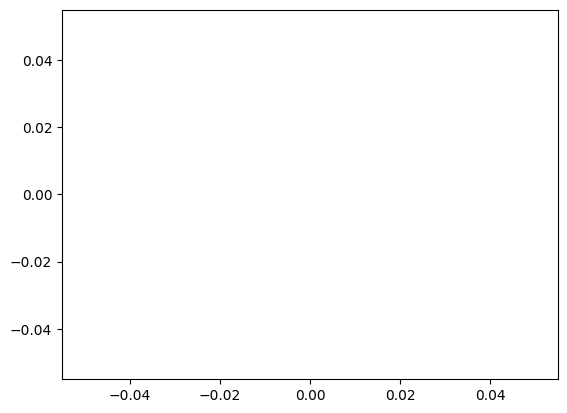

In [ ]:
#| eval: false
plot_buffer_data()

In [ ]:
#| eval: false
while not server.buffer_ready():
    server.accumulate()

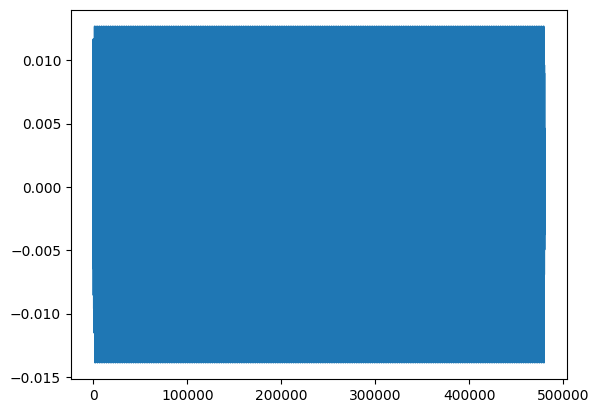

In [ ]:
#| eval: false
plot_buffer_data()

In [ ]:
#| eval: false
from IPython.display import Audio

In [ ]:
#| eval: false
rate = 48_000
Audio(data=server.buffer.data, rate=rate)

In [ ]:
#| eval: false
server.buffer.reset()